In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install bs4
!pip install pandas

In [ ]:
import requests
import pandas as pd
import csv
from bs4 import BeautifulSoup
import time

In [ ]:
url =  "http://books.toscrape.com/"
response = requests.get(url)
if response.status_code == 200:
  print("response successful")
else:
  print("request failed")

response successful


In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [ ]:
 books = soup.find_all('h3') #all book in pg 1

 start_time = time.time()
 books_extracted = 0

 #loop to extract info
 for book in books:
  book_url = book.find('a')['href']
  book_response = requests.get(url + book_url)
  book_soup = BeautifulSoup(book_response.content, "html.parser")

  title = book_soup.find('h1').text
  category = book_soup.find('ul', class_="breadcrumb").find_all('a')[2].text.strip()
  rating = book_soup.find('p', class_="star-rating")['class'][1]
  price = book_soup.find('p', class_='price_color').text.strip()[1:]
  availability = book_soup.find('p', class_='availability').text.strip()

  books_extracted += 1

  end_time = time.time()
  total_time = (end_time-start_time)/60.0

  print(f'Title: {title}')
  print(f'Category: {category}')
  print(f'Rating: {rating}')
  print(f'Price: {price}')
  print(f'Availability: {availability}')
  print(f'Books extracted: {books_extracted}')
  print('***********************')


Title: A Light in the Attic
Category: Poetry
Rating: Three
Price: 51.77
Availability: In stock (22 available)
Books extracted: 1
***********************
Title: Tipping the Velvet
Category: Historical Fiction
Rating: One
Price: 53.74
Availability: In stock (20 available)
Books extracted: 2
***********************
Title: Soumission
Category: Fiction
Rating: One
Price: 50.10
Availability: In stock (20 available)
Books extracted: 3
***********************
Title: Sharp Objects
Category: Mystery
Rating: Four
Price: 47.82
Availability: In stock (20 available)
Books extracted: 4
***********************
Title: Sapiens: A Brief History of Humankind
Category: History
Rating: Five
Price: 54.23
Availability: In stock (20 available)
Books extracted: 5
***********************
Title: The Requiem Red
Category: Young Adult
Rating: One
Price: 22.65
Availability: In stock (19 available)
Books extracted: 6
***********************
Title: The Dirty Little Secrets of Getting Your Dream Job
Category: Business


In [ ]:
  books_data = []

  for page_num in range(1, 51):
      page_url = f'https://books.toscrape.com/catalogue/page-{page_num}.html'
      resp = requests.get(page_url, timeout=10)
      resp.raise_for_status()
      soup = BeautifulSoup(resp.content, 'html.parser')
      thumbnails = soup.find_all('h3')

      for thumb in thumbnails:
          rel = thumb.find('a')['href']
          detail_url = requests.compat.urljoin(page_url, rel)
          book_resp = requests.get(detail_url, timeout=10)
          book_resp.raise_for_status()
          book_soup = BeautifulSoup(book_resp.content, 'html.parser')

          title = book_soup.find('h1').get_text(strip=True)

          desc_block = book_soup.find(id='product_description')
          description = (
              desc_block.find_next_sibling('p').get_text(strip=True)
              if desc_block else ''
          )

          info = {}
          table = book_soup.find('table', class_='table table-striped')
          for row in table.find_all('tr'):
              info[row.th.get_text(strip=True)] = row.td.get_text(strip=True)

          upc   = info.get('UPC', '')
          price = info.get('Price (excl. tax)', '')
          avail = info.get('Availability', '')

          price = price.split('£')[-1].strip()
          price = float(price)
          avail = avail.split('(')[0].strip()

          books_data.append([title, description, price, upc, avail])

      print(f"Page {page_num}: {len(thumbnails)} books (total {len(books_data)})")

Page 1: 20 books (total 20)
Page 2: 20 books (total 40)
Page 3: 20 books (total 60)
Page 4: 20 books (total 80)
Page 5: 20 books (total 100)
Page 6: 20 books (total 120)
Page 7: 20 books (total 140)
Page 8: 20 books (total 160)
Page 9: 20 books (total 180)
Page 10: 20 books (total 200)
Page 11: 20 books (total 220)
Page 12: 20 books (total 240)
Page 13: 20 books (total 260)
Page 14: 20 books (total 280)
Page 15: 20 books (total 300)
Page 16: 20 books (total 320)
Page 17: 20 books (total 340)
Page 18: 20 books (total 360)
Page 19: 20 books (total 380)
Page 20: 20 books (total 400)
Page 21: 20 books (total 420)
Page 22: 20 books (total 440)
Page 23: 20 books (total 460)
Page 24: 20 books (total 480)
Page 25: 20 books (total 500)
Page 26: 20 books (total 520)
Page 27: 20 books (total 540)
Page 28: 20 books (total 560)
Page 29: 20 books (total 580)
Page 30: 20 books (total 600)
Page 31: 20 books (total 620)
Page 32: 20 books (total 640)
Page 33: 20 books (total 660)
Page 34: 20 books (tota

In [ ]:
  df = pd.DataFrame(
      books_data,
      columns=['Title', 'Description', 'Price', 'UPC', 'Availability']
  )

  for col in ['Description', 'Availability']:
      df[col] = df[col].str.strip()

  df #voilà

,Title,Description,Price,UPC,Availability
0,A Light in the Attic,It's hard to imagine a world without A Light i...,51.77,a897fe39b1053632,In stock
1,Tipping the Velvet,"""Erotic and absorbing...Written with starling ...",53.74,90fa61229261140a,In stock
2,Soumission,"Dans une France assez proche de la nôtre, un h...",50.10,6957f44c3847a760,In stock
3,Sharp Objects,"WICKED above her hipbone, GIRL across her hear...",47.82,e00eb4fd7b871a48,In stock
4,Sapiens: A Brief History of Humankind,From a renowned historian comes a groundbreaki...,54.23,4165285e1663650f,In stock
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,,55.53,cd2a2a70dd5d176d,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",High school student Kei Nagai is struck dead i...,57.06,bfd5e1701c862ac3,In stock
997,A Spy's Devotion (The Regency Spies of London #1),"In England’s Regency era, manners and elegance...",16.97,19fec36a1dfb4c16,In stock
998,1st to Die (Women's Murder Club #1),"James Patterson, bestselling author of the Ale...",53.98,f684a82adc49f011,In stock


In [ ]:
 print(df.head())

                                   Title  \
0                   A Light in the Attic   
1                     Tipping the Velvet   
2                             Soumission   
3                          Sharp Objects   
4  Sapiens: A Brief History of Humankind   

                                         Description  Price               UPC  \
0  It's hard to imagine a world without A Light i...  51.77  a897fe39b1053632   
1  "Erotic and absorbing...Written with starling ...  53.74  90fa61229261140a   
2  Dans une France assez proche de la nôtre, un h...  50.10  6957f44c3847a760   
3  WICKED above her hipbone, GIRL across her hear...  47.82  e00eb4fd7b871a48   
4  From a renowned historian comes a groundbreaki...  54.23  4165285e1663650f   

  Availability  
0     In stock  
1     In stock  
2     In stock  
3     In stock  
4     In stock  


In [ ]:
 print(df.tail())

                                                 Title  \
995  Alice in Wonderland (Alice's Adventures in Won...   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)   
997  A Spy's Devotion (The Regency Spies of London #1)   
998                1st to Die (Women's Murder Club #1)   
999                 1,000 Places to See Before You Die   

                                           Description  Price  \
995                                                     55.53   
996  High school student Kei Nagai is struck dead i...  57.06   
997  In England’s Regency era, manners and elegance...  16.97   
998  James Patterson, bestselling author of the Ale...  53.98   
999  Around the World, continent by continent, here...  26.08   

                  UPC Availability  
995  cd2a2a70dd5d176d     In stock  
996  bfd5e1701c862ac3     In stock  
997  19fec36a1dfb4c16     In stock  
998  f684a82adc49f011     In stock  
999  228ba5e7577e1d49     In stock  


In [ ]:
 df.to_csv("Raneem_Web_Books_Scraped.csv", index = False)

In [ ]:
 pd.read_csv("Raneem_Web_Books_Scraped.csv")

,Title,Description,Price,UPC,Availability
0,A Light in the Attic,It's hard to imagine a world without A Light i...,51.77,a897fe39b1053632,In stock
1,Tipping the Velvet,"""Erotic and absorbing...Written with starling ...",53.74,90fa61229261140a,In stock
2,Soumission,"Dans une France assez proche de la nôtre, un h...",50.10,6957f44c3847a760,In stock
3,Sharp Objects,"WICKED above her hipbone, GIRL across her hear...",47.82,e00eb4fd7b871a48,In stock
4,Sapiens: A Brief History of Humankind,From a renowned historian comes a groundbreaki...,54.23,4165285e1663650f,In stock
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,NaN,55.53,cd2a2a70dd5d176d,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",High school student Kei Nagai is struck dead i...,57.06,bfd5e1701c862ac3,In stock
997,A Spy's Devotion (The Regency Spies of London #1),"In England’s Regency era, manners and elegance...",16.97,19fec36a1dfb4c16,In stock
998,1st to Die (Women's Murder Club #1),"James Patterson, bestselling author of the Ale...",53.98,f684a82adc49f011,In stock


Additional cause I am curius to descovre more about books

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
books_data = []
for page_num in range(1, 6):
    url = f'https://books.toscrape.com/catalogue/page-{page_num}.html'
    resp = requests.get(url, timeout=10)
    resp.raise_for_status()
    soup = BeautifulSoup(resp.content, 'html.parser')
    thumbs = soup.find_all('h3')

    for t in thumbs:
        detail_url = requests.compat.urljoin(url, t.find('a')['href'])
        r2 = requests.get(detail_url, timeout=10)
        r2.raise_for_status()
        s2 = BeautifulSoup(r2.content, 'html.parser')

        title = s2.find('h1').get_text(strip=True)
        desc_block = s2.find(id='product_description')
        desc = desc_block.find_next_sibling('p').get_text(strip=True) if desc_block else ''

        table = s2.find('table', class_='table table-striped')
        info = {row.th.get_text(strip=True): row.td.get_text(strip=True)
                for row in table.find_all('tr')}

        price = info.get('Price (excl. tax)', '').split('£')[-1]
        avail = info.get('Availability', '').split('(')[0].strip()
        upc   = info.get('UPC', '')

        books_data.append([title, desc, price, upc, avail])

df = pd.DataFrame(
    books_data,
    columns=['Title', 'Description', 'Price', 'UPC', 'Availability']
)

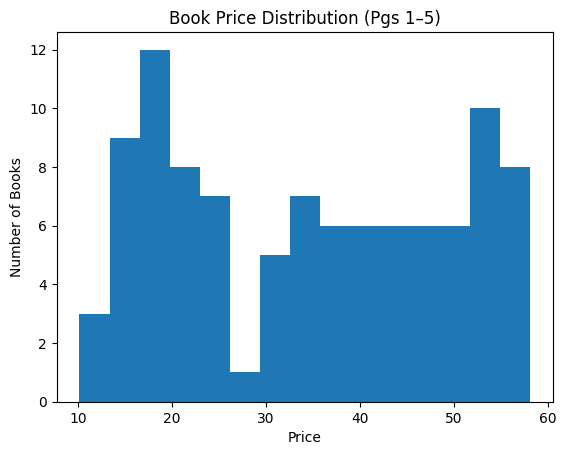

In [ ]:
plt.figure()
plt.hist(df['Price'].astype(float), bins=15)
plt.title('Book Price Distribution (Pgs 1–5)')
plt.xlabel('Price')
plt.ylabel('Number of Books')
plt.show()

Text(0.5, 1.0, 'Violin')

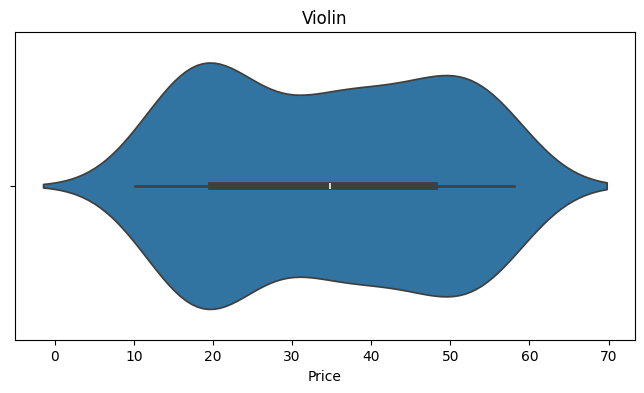

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(x=df['Price'].astype(float)); plt.title("Violin")

Text(0.5, 1.0, 'Price distribution')

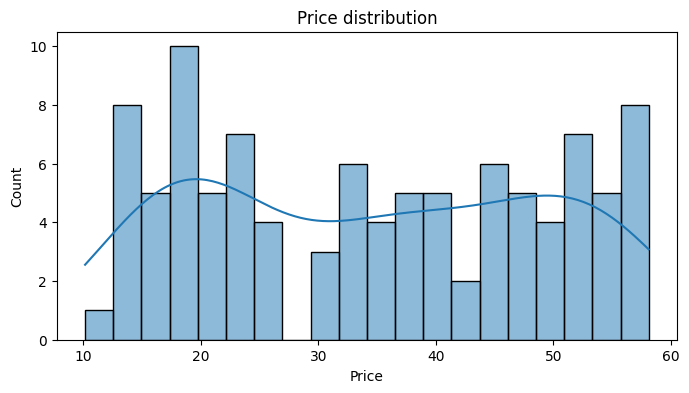

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'].astype(float), kde=True, bins=20)
plt.title("Price distribution")

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

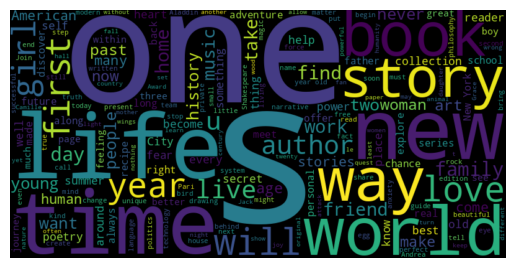

In [ ]:
from wordcloud import WordCloud
text = " ".join(df['Description'])
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc, interpolation='bilinear'); plt.axis('off')

Text(0.5, 1.0, 'Top 20 Terms in Descriptions')

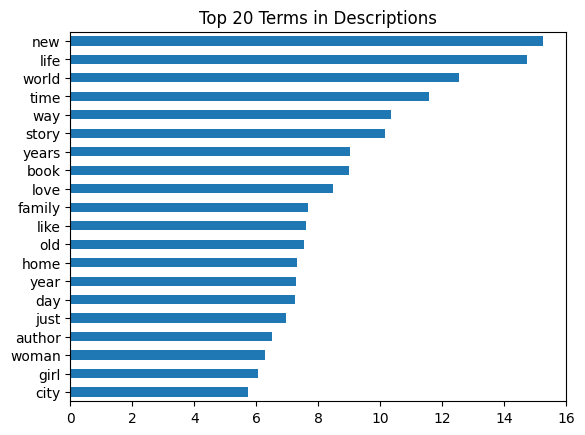

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_mat = tfidf.fit_transform(df['Description'])
terms = tfidf.get_feature_names_out()
scores = tfidf_mat.sum(axis=0).A1
pd.Series(scores, index=terms).sort_values().plot(kind='barh')
plt.title("Top 20 Terms in Descriptions")